In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, fbeta_score, make_scorer, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
    
import scipy
import numpy as np
import math

In [2]:
df = pd.read_csv("../data/train.csv")  
Y=df['SalePrice']

SEE WHICH CONT. FEATURES CORRELATE MOST WITH SALE PRICE

In [3]:
cor = df.corr()
cor_target = abs(cor["SalePrice"])
cor_target[cor_target>0.6]

OverallQual    0.790982
TotalBsmtSF    0.613581
1stFlrSF       0.605852
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [4]:
X=df[['OverallQual', 'YearBuilt', 'ExterQual', 'HeatingQC', 'KitchenQual','GrLivArea', 'GarageCars']]
Y=df['SalePrice']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

Categorical Data

In [6]:
X_train_cat=X_train[['ExterQual', 'HeatingQC', 'KitchenQual']]
X_test_cat=X_test[['ExterQual', 'HeatingQC', 'KitchenQual']]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc.fit(X_train_cat)

X_train_onehot = enc.transform(X_train_cat)
X_test_onehot = enc.transform(X_test_cat)

Continuous Data

<ipython-input-7-b57665ed76c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['YearBuilt'] = abs(X_train['YearBuilt']-most_recent)
<ipython-input-7-b57665ed76c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['YearBuilt'] = abs(X_test['YearBuilt']-most_recent)


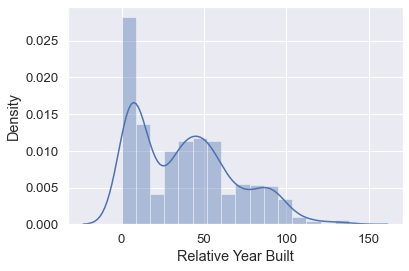

<ipython-input-7-b57665ed76c2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['YearBuilt'] = np.sqrt(X_train['YearBuilt'])


0.5961594803514906


<ipython-input-7-b57665ed76c2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['YearBuilt'] = np.sqrt(X_test['YearBuilt'])


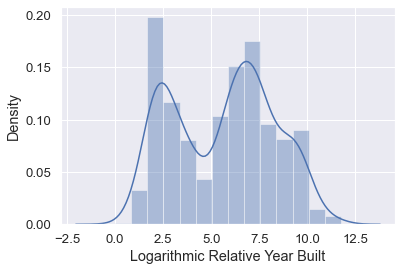

-0.027931330845996364


<ipython-input-7-b57665ed76c2>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GrLivArea'] = np.log(X_train['GrLivArea']+1)
<ipython-input-7-b57665ed76c2>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GrLivArea'] = np.log(X_test['GrLivArea']+1)


In [7]:
# Make year built relative to newest trainingbuilding
most_recent = max(X_train['YearBuilt'])
X_train['YearBuilt'] = abs(X_train['YearBuilt']-most_recent)
X_test['YearBuilt'] = abs(X_test['YearBuilt']-most_recent)

# Plot skew
sns.set(font_scale=1.2)
a=sns.distplot(X_train['YearBuilt'])
a.set(xlabel='Relative Year Built', ylabel='Density')
plt.show()
print(X_train['YearBuilt'].skew())

# Remove skew for Year Built
X_train['YearBuilt'] = np.sqrt(X_train['YearBuilt'])
X_test['YearBuilt'] = np.sqrt(X_test['YearBuilt'])

b=sns.distplot(X_train['YearBuilt'])
b.set(xlabel='Logarithmic Relative Year Built', ylabel='Density')
plt.show()
print(X_train['YearBuilt'].skew())

# Remove skew for GrLivArea
X_train['GrLivArea'] = np.log(X_train['GrLivArea']+1)
X_test['GrLivArea'] = np.log(X_test['GrLivArea']+1)

# scaling
X_train_cont = X_train[['OverallQual', 'YearBuilt','GrLivArea', 'GarageCars']]
X_test_cont = X_test[['OverallQual', 'YearBuilt','GrLivArea', 'GarageCars']]

scaler = StandardScaler()
scaler.fit(X_train_cont)
X_train_scaled = scaler.transform(X_train_cont)
X_test_scaled = scaler.transform(X_test_cont)

# Join data
X_test_cleaned = np.concatenate((X_test_onehot,X_test_scaled), axis=1)
X_train_cleaned = np.concatenate((X_train_onehot,X_train_scaled), axis=1)

CHOOSE AND FIT MODEL:

rmse with log = 0.15442431460163092


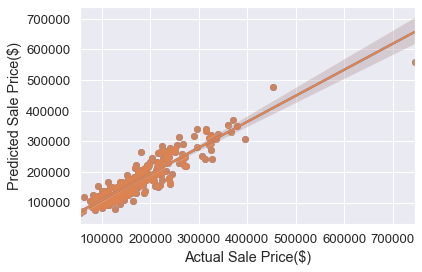

training: 97.02
test: 85.62


In [8]:
# choose model:
# model = LinearRegression()
model = RandomForestRegressor()

# fit model
model.fit(X_train_cleaned,y_train)
predictions = model.predict(X_test_cleaned)
sns.regplot(y_test,predictions)

# evaluate lrmse
y_test=y_test[predictions>=0]
predictions=predictions[predictions>=0]
mse = mean_squared_log_error(y_test,predictions)
base_rmse = math.sqrt(mse)
print('rmse with log = '+str(base_rmse))

ax=sns.regplot(y_test,predictions)
ax.set(xlabel='Actual Sale Price($)', ylabel='Predicted Sale Price($)')
plt.show()

model_score = round(model.score(X_train_cleaned, y_train) * 100, 2)
print('training: ' + str(model_score))

model_score = round(model.score(X_test_cleaned, y_test) * 100, 2)
print('test: ' + str(model_score))
base_accuracy=model_score

In [9]:
# default hyperparameters - most important = n_estimators and max_features:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
# print('Parameters currently in use:\n')
# pprint(rf.get_params())

# create parameter grid to select from:
# this gives 4320 options but grid means doesn't try all
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [10]:
from sklearn.metrics import fbeta_score, make_scorer
def rmsle(predictions, y_test):
    y_test=y_test[predictions>=0]
    predictions=predictions[predictions>=0]
    mse = mean_squared_log_error(y_test,predictions)
    return math.sqrt(mse)

scorer = make_scorer(rmsle, greater_is_better=False)

model_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring=scorer)
model_random.fit(X_train_cleaned,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42,
                   scoring=make_scorer(rmsle, greater_is_better=False),
                   verbose=2)

In [11]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = round(model.score(test_features, test_labels) * 100, 2)
    
    test_labels=test_labels[predictions>=0]
    predictions=predictions[predictions>=0]
    mse = mean_squared_log_error(y_test,predictions)
    lrmse = math.sqrt(mse)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('lrmse: '+str(lrmse))
    print()
    return accuracy, lrmse

best_random = model_random.best_estimator_
random_accuracy,random_error = evaluate(best_random, X_test_cleaned, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
print('Improvement of {:0.2f}%.'.format( 100 * (base_rmse - random_error) / base_rmse))
print()
print('Final accuracy: {:0.2f}%.'.format(random_accuracy))
print('Final lrmse: '+ str(random_error))

Model Performance
Accuracy = 84.41%.
lrmse: 0.14939570770473456

Improvement of -1.41%.
Improvement of 3.26%.
